First 5 rows of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa



Basic statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


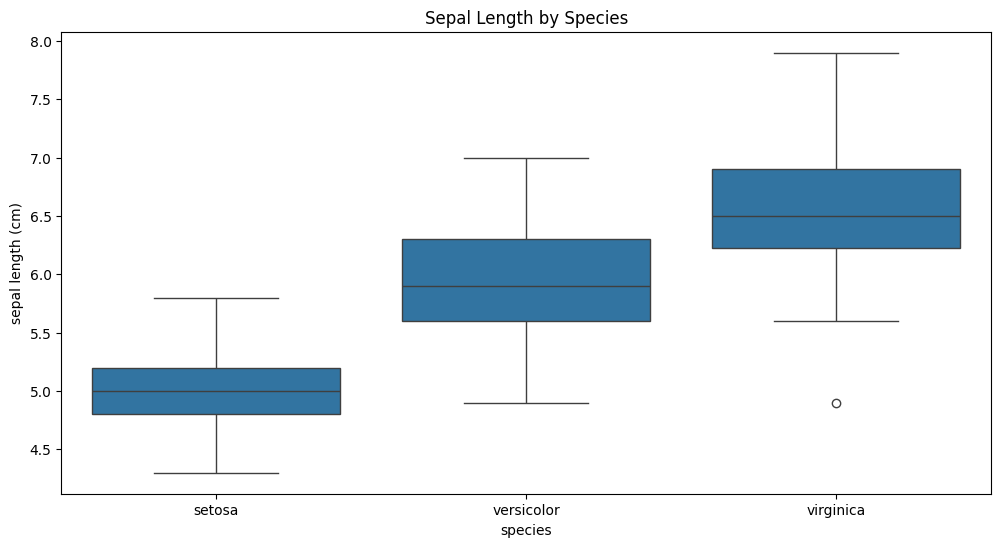



=== T-TEST IMPLEMENTATION ===
Comparing sepal lengths between setosa and versicolor species

T-statistic: -10.5210
P-value: 0.0000
Reject the null hypothesis: There is a significant difference between the means.


=== ANOVA IMPLEMENTATION ===
Comparing sepal lengths across all three species

F-statistic: 119.2645
P-value: 0.0000
Reject the null hypothesis: At least one group mean is different.

Performing post-hoc Tukey HSD test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.datasets import load_iris
from IPython.display import display  # Importing display for Jupyter environments

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
print("First 5 rows of the Iris dataset:")
display(iris_df.head())

# Basic statistics
print("\nBasic statistics:")
display(iris_df.describe())

# Visualize the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Sepal Length by Species')
plt.show()

## T-Test Implementation
print("\n\n=== T-TEST IMPLEMENTATION ===")
print("Comparing sepal lengths between setosa and versicolor species")

# Extract the data for two species
setosa_sepal = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(setosa_sepal, versicolor_sepal)

print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the means.")

## ANOVA Implementation
print("\n\n=== ANOVA IMPLEMENTATION ===")
print("Comparing sepal lengths across all three species")

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    iris_df[iris_df['species'] == 'setosa']['sepal length (cm)'],
    iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)'],
    iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']
)

print(f"\nF-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is different.")

    # Post-hoc test (Tukey's HSD) if ANOVA is significant
    print("\nPerforming post-hoc Tukey HSD test:")
    tukey_results = pairwise_tukeyhsd(iris_df['sepal length (cm)'], iris_df['species'])
    print(tukey_results)




Performing post-hoc Tukey HSD test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


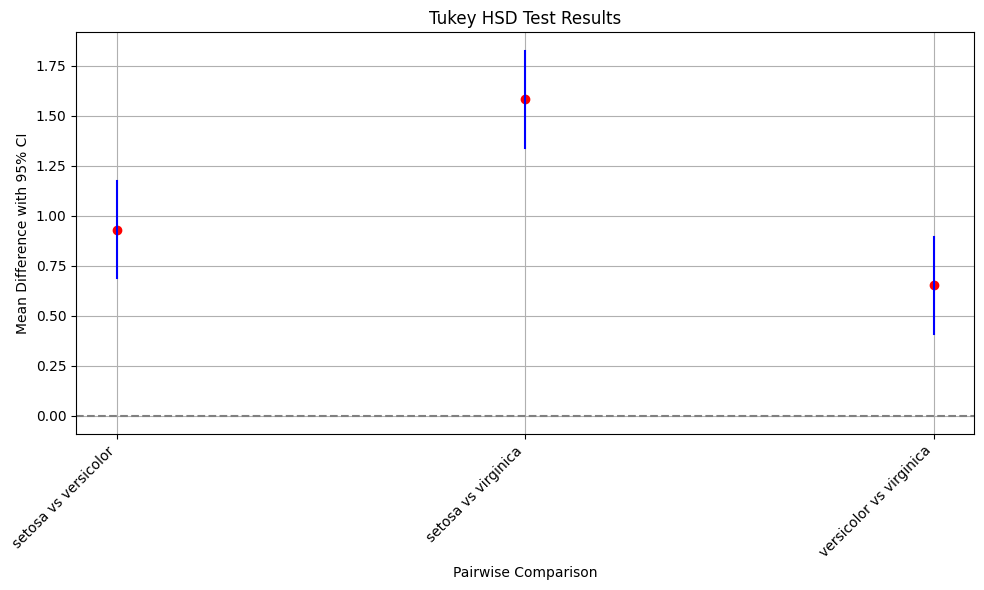

In [ ]:
# Perform Tukey HSD post-hoc test
print("\nPerforming post-hoc Tukey HSD test:")
tukey_results = pairwise_tukeyhsd(iris_df['sepal length (cm)'], iris_df['species'])

# Display the summary of the Tukey HSD test
print(tukey_results.summary())

# Convert the summary to a DataFrame
tukey_df = pd.DataFrame(tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])

# Create a new column to label each comparison (e.g., 'setosa vs versicolor')
tukey_df['comparison'] = tukey_df['group1'] + ' vs ' + tukey_df['group2']

# Plot
plt.figure(figsize=(10, 6))
for i, row in tukey_df.iterrows():
    plt.plot([i, i], [row['lower'], row['upper']], color='blue')  # Confidence intervals
    plt.scatter(i, row['meandiff'], color='red')  # Mean difference

# Customize plot
plt.title('Tukey HSD Test Results')
plt.xticks(range(len(tukey_df)), tukey_df['comparison'], rotation=45, ha='right')
plt.axhline(0, linestyle='--', color='gray')  # Reference line at 0
plt.xlabel('Pairwise Comparison')
plt.ylabel('Mean Difference with 95% CI')
plt.tight_layout()
plt.grid(True)
plt.show()

